# Desiree's scratch pad

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from scipy import stats
import math

from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
import sklearn.preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.preprocessing import LabelEncoder

import Prepare as p

import datetime

## Acquire Data

In [2]:
df = pd.read_csv('texas.csv')

In [3]:
df.head(3).T

,0,1,2
AGY,101,104,101
NAME,SENATE ...,LEGISLATIVE BUDGET BOARD ...,SENATE ...
LASTNAME,GILLIAM,GILLIAM,NELSON
FIRSTNAME,STACEY,STACEY,DAVID
MI,L,L,
JOBCLASS,7101,C160,7101
JC TITLE,LEG. OFFICIAL/ADMINISTRATOR ...,COMMITTEE DIRECTOR ...,LEG. OFFICIAL/ADMINISTRATOR ...
RACE,WHITE,WHITE,WHITE
SEX,FEMALE,FEMALE,MALE
EMPTYPE,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME


In [4]:
df = p.prepare_tex(df)

df.head(3).T

,0,1,2
agency_id,101,104,101
agency,SENATE,LEGISLATIVE BUDGET BOARD,SENATE
lastname,GILLIAM,GILLIAM,NELSON
firstname,STACEY,STACEY,DAVID
title,LEG. OFFICIAL/ADMINISTRATOR,COMMITTEE DIRECTOR,LEG. OFFICIAL/ADMINISTRATOR
race,WHITE,WHITE,WHITE
sex,FEMALE,FEMALE,MALE
emptype,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME,URP - UNCLASSIFIED REGULAR PART-TIME
hire_date,2013-07-01 00:00:00,2017-11-01 00:00:00,1998-12-01 00:00:00
hours_worked,20.0,20.0,20.0


In [5]:
df.dtypes

agency_id                  int64
agency                    object
lastname                  object
firstname                 object
title                     object
race                      object
sex                       object
emptype                   object
hire_date         datetime64[ns]
hours_worked             float64
monthly_salary           float64
annual_salary            float64
dtype: object

In [6]:
df[df['hire_date'] > pd.to_datetime('now')]

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary


In [7]:
df.loc[df.hire_date=='2069-01-14'].hire_date

Series([], Name: hire_date, dtype: datetime64[ns])

In [9]:
# df = df.drop(index=[794, 118710])

In [10]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,8100.0,97200.0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,7000.0,84000.0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,9500.0,114000.0
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,8000.0,96000.0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,3365.4,40384.8


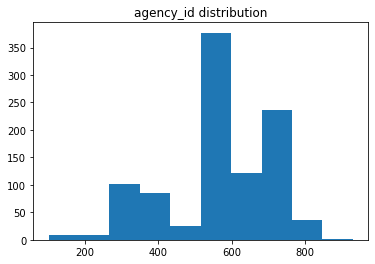

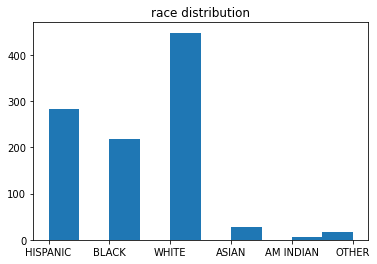

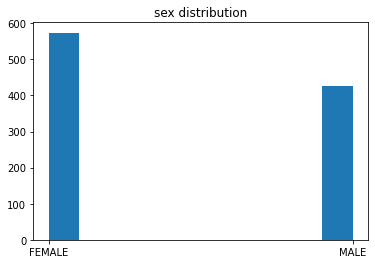

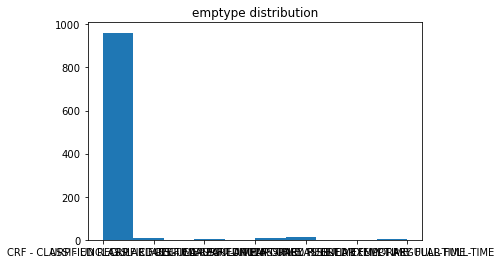

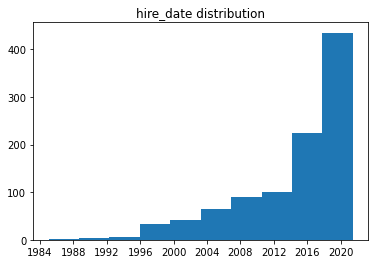

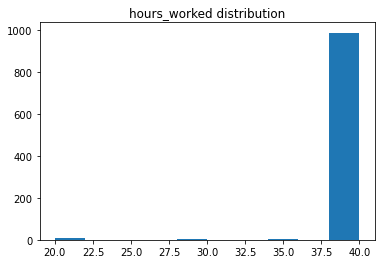

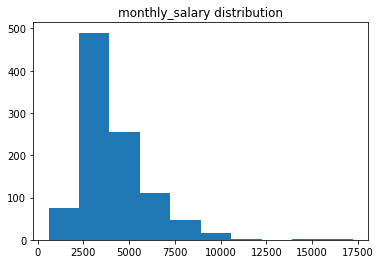

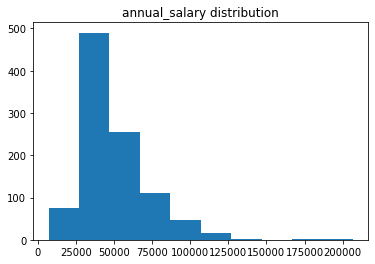

In [11]:
sample = df.drop(columns = ['agency', 'lastname', 'firstname', 'title']).sample(1000)

for col in sample.columns:
        plt.hist(sample[col])
        plt.title(f"{col} distribution")
        plt.show()

In [12]:
column = df.drop(columns = ['agency']).sample(1000).columns

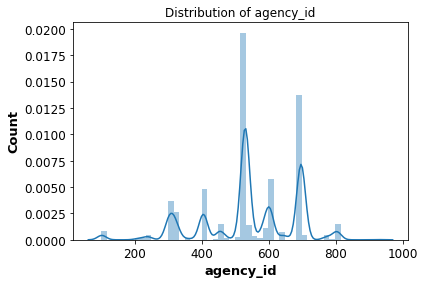

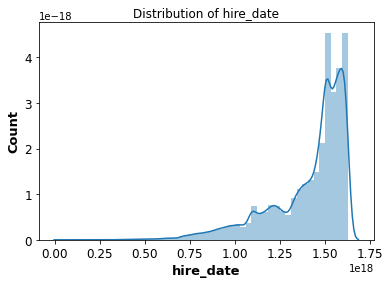

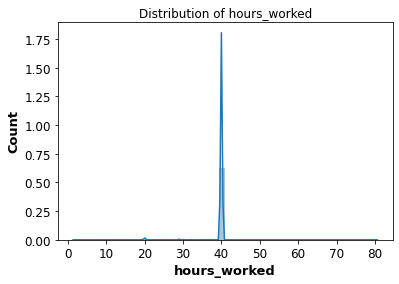

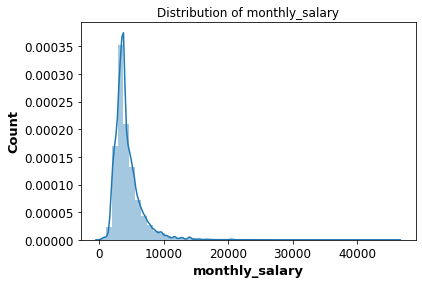

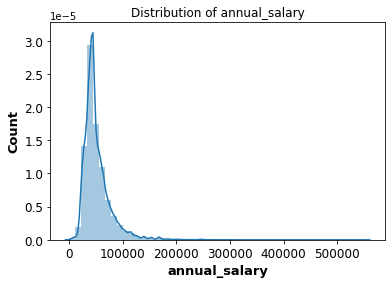

In [13]:
# sample = df.sample(1000)

for i in column:
        if df[i].dtypes != 'object':
            sns.distplot(df[i])
            plt.xticks(fontsize= 12)
            plt.yticks(fontsize=12)
            plt.ylabel("Count", fontsize= 13, fontweight="bold")
            plt.xlabel(i, fontsize=13, fontweight="bold")
            plt.title('Distribution of '+i)
            plt.show()

In [14]:
df.sample(5)

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,monthly_salary,annual_salary
107395,696,TEXAS DEPARTMENT OF CRIMINAL JUSTICE,BROWN,TAMARA,CORREC OFFCR III,BLACK,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2020-06-29,40.0,3019.84,36238.08
17216,323,TEACHER RETIREMENT SYSTEM,LANG,ERIC,SENIOR MANAGING DIRECTOR,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2006-02-01,40.0,32666.66,391999.92
21103,405,DEPARTMENT OF PUBLIC SAFETY,CASTRO,RUTH,INVESTIGATOR IV,HISPANIC,FEMALE,CRF - CLASSIFIED REGULAR FULL-TIME,2008-09-09,40.0,3375.75,40509.00
55406,529,HEALTH AND HUMAN SERVICES COMMISSION,MOORE,BRIAN,TEXAS WORKS SUPERVISOR I,BLACK,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,2013-10-01,40.0,3820.97,45851.64
141214,802,PARKS AND WILDLIFE DEPARTMENT,TRUE,CHRIS,MGR V,WHITE,MALE,CRF - CLASSIFIED REGULAR FULL-TIME,1996-09-12,40.0,8498.79,101985.48


In [15]:
df = p.create_features(df)

In [16]:
df.title.str.contains('ELECTED')

0         False
1         False
2         False
3         False
4         False
          ...  
144733    False
144734    False
144735    False
144736    False
144737    False
Name: title, Length: 144730, dtype: bool

In [17]:
df['elected_official'] = np.where(df.title.str.contains('ELECTED'), 1, 0)

In [18]:
df.head()

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,annual_salary,is_female,is_white,is_hispanic,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,elected_official
0,101,SENATE,GILLIAM,STACEY,LEG. OFFICIAL/ADMINISTRATOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2013-07-01,20.0,...,97200.0,1,1,0,0,0,5,96,8.0,0
1,104,LEGISLATIVE BUDGET BOARD,GILLIAM,STACEY,COMMITTEE DIRECTOR,WHITE,FEMALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,84000.0,1,1,0,0,0,5,44,3.7,0
2,101,SENATE,NELSON,DAVID,LEG. OFFICIAL/ADMINISTRATOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,1998-12-01,20.0,...,114000.0,0,1,0,0,0,5,271,22.6,0
3,104,LEGISLATIVE BUDGET BOARD,NELSON,DAVID,SENIOR BUDGET ADVISOR,WHITE,MALE,URP - UNCLASSIFIED REGULAR PART-TIME,2017-11-01,20.0,...,96000.0,0,1,0,0,0,5,44,3.7,0
4,101,SENATE,ROCHA,MARIE,LEG. SERVICE/MAINTENANCE,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2003-05-01,41.0,...,40384.8,1,0,1,0,1,3,218,18.2,0


In [19]:
df[df.title == 'ELECTED OFFICIAL']

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,annual_salary,is_female,is_white,is_hispanic,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,elected_official
89,101,SENATE,ALVARADO,CAROL,ELECTED OFFICIAL,HISPANIC,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2018-12-21,40.0,...,7200.0,1,0,1,0,1,3,30,2.5,1
117,101,SENATE,BETTENCOURT,PAUL,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2015-01-13,40.0,...,7200.0,0,1,0,0,0,5,78,6.5,1
121,101,SENATE,BIRDWELL,BRIAN,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2010-07-02,40.0,...,7200.0,0,1,0,0,0,5,132,11.0,1
122,101,SENATE,BLANCO,CESAR,ELECTED OFFICIAL,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2021-01-12,40.0,...,7200.0,0,0,1,0,1,3,6,0.5,1
144,101,SENATE,BUCKINGHAM,DAWN,ELECTED OFFICIAL,WHITE,FEMALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2017-01-10,40.0,...,7200.0,1,1,0,0,0,5,54,4.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,102,HOUSE OF REPRESENTATIVES,WALLE,ARMANDO,ELECTED OFFICIAL,HISPANIC,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2009-01-13,40.0,...,7200.0,0,0,1,0,1,3,150,12.5,1
1478,102,HOUSE OF REPRESENTATIVES,WHITE,JAMES,ELECTED OFFICIAL,BLACK,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2011-01-11,40.0,...,7200.0,0,0,0,1,1,2,126,10.5,1
1498,102,HOUSE OF REPRESENTATIVES,WILSON JR,TERRY,ELECTED OFFICIAL,WHITE,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2017-01-10,40.0,...,7200.0,0,1,0,0,0,5,54,4.5,1
1505,102,HOUSE OF REPRESENTATIVES,WU,EUGENE,ELECTED OFFICIAL,ASIAN,MALE,URF - UNCLASSIFIED REGULAR FULL-TIME,2013-01-08,40.0,...,7200.0,0,0,0,0,1,1,102,8.5,1


In [20]:
df.title.value_counts()

CORREC  OFFICER IV                8753
CORREC  OFFICER V                 7350
TEXAS WORKS ADVISOR II            3812
CORREC OFFCR III                  3652
DIRECT SUPPORT PROFESSIONAL I     2483
                                  ... 
TEAM LEADER TLC SUPP TEAM            1
PROF DEVELOPMENT MANAGER             1
LEG OFFICE CONSULTANT IV             1
EXECUTIVE ADMINISTRATOR, WATER       1
MANAGING DIRECTOR                    1
Name: title, Length: 1406, dtype: int64

In [21]:
df[df.title.str.contains('ELECTED')].title.value_counts()

ELECTED OFFICIALS STAFF    597
ELECTED OFFICIAL           181
Name: title, dtype: int64

In [22]:
keywords = ['JUDGE', 'SUPREME']

np.where((df[(df.title == 'GOVERNOR') | (df.type == 'LIEUTENANT GOVERNOR')]),1,0)

AttributeError: 'DataFrame' object has no attribute 'type'

In [25]:
np.where((df[(df.title == 'GOVERNOR') | (df.title == 'LIEUTENANT GOVERNOR')]))

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 13, 17, 18, 19]))

In [46]:
(df[(df.title == 'GOVERNOR') | (df.title == 'LIEUTENANT GOVERNOR') |
   (df.title == 'ATTORNEY GENERAL') | (df.title == 'COMPTROLLER OF PUBLIC ACCOUNTS' |
                                      (df.title.str.startswith('COMMISSIONER')))])

TypeError: Cannot perform 'ror_' with a dtyped [bool] array and scalar of type [bool]

In [45]:
df[df.title.str.startswith('COMMISSIONER')]

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,annual_salary,is_female,is_white,is_hispanic,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,elected_official
10904,305,GENERAL LAND OFFICE AND VETERAN'S LAND BOARD,BUSH,GEORGE,COMMISSIONER,HISPANIC,MALE,ERF - EXEMPT REGULAR FULL-TIME,2015-01-02,40.0,...,140937.96,0,0,1,0,1,3,78,6.5,0
12192,320,TEXAS WORKFORCE COMMISSION,ALVAREZ,JULIAN,"COMMISSIONER, WORKFORCE COMM.",HISPANIC,MALE,ERF - EXEMPT REGULAR FULL-TIME,2016-02-22,40.0,...,201000.00,0,0,1,0,1,3,64,5.3,0
13126,320,TEXAS WORKFORCE COMMISSION,DEMERSON,AARON,"COMMISSIONER, WORKFORCE COMM.",BLACK,MALE,ERF - EXEMPT REGULAR FULL-TIME,2014-01-01,40.0,...,201000.00,0,0,0,1,1,2,90,7.5,0
30800,454,TEXAS DEPARTMENT OF INSURANCE,BROWN,CASSANDRA,COMMISSIONER OF WORKERS' COMP,WHITE,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,2011-09-06,40.0,...,169110.96,1,1,0,0,0,5,118,9.8,0
33467,469,CREDIT UNION DEPARTMENT,KOLHOFF,JOHN,COMMISSIONER CREDIT UNION DEPA,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2018-12-01,40.0,...,192499.92,0,1,0,0,0,5,31,2.6,0
33509,473,PUBLIC UTILITY COMMISSION OF TEXAS,COBOS,LORI,COMMISSIONER,HISPANIC,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,2021-06-22,40.0,...,201000.00,1,0,1,0,1,3,0,0.0,0
33586,473,PUBLIC UTILITY COMMISSION OF TEXAS,MCADAMS,JAMES,COMMISSIONER,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2021-04-16,40.0,...,201000.00,0,1,0,0,0,5,2,0.2,0
75812,530,DEPARTMENT OF FAMILY AND PROTECTIVE SERVICES,MASTERS,JAIME,"COMMISSIONER, DFPS",BLACK,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,2019-12-01,40.0,...,214999.92,1,0,0,1,1,2,19,1.6,0
82603,537,DEPARTMENT OF STATE HEALTH SERVICES,HELLERSTEDT,JOHN,"COMMISSIONER, DSHS",WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2015-12-16,40.0,...,271082.88,0,1,0,0,0,5,66,5.5,0
85950,582,TEXAS COMMISSION ON ENVIRONMENTAL QUALITY,JANECKA,ROBERT,COMMISSIONER,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2019-09-17,40.0,...,201000.00,0,1,0,0,0,5,21,1.8,0


In [41]:
df[df.title.str.contains('JUSTICE')]

,agency_id,agency,lastname,firstname,title,race,sex,emptype,hire_date,hours_worked,...,annual_salary,is_female,is_white,is_hispanic,is_black,is_BIPOC,race_encoded,tenure_months,tenure_years,elected_official
2064,201,SUPREME COURT OF TEXAS,BLACKLOCK,JAMES,JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2018-01-02,40.0,...,168000.00,0,1,0,0,0,5,42,3.5,0
2065,201,SUPREME COURT OF TEXAS,BLAND,JANE,JUSTICE,WHITE,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,2019-09-11,40.0,...,201600.00,1,1,0,0,0,5,22,1.8,0
2067,201,SUPREME COURT OF TEXAS,BOYD,JEFFREY,JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2012-12-04,40.0,...,201600.00,0,1,0,0,0,5,103,8.6,0
2070,201,SUPREME COURT OF TEXAS,BUSBY,JUSTIN,JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2019-03-20,40.0,...,201600.00,0,1,0,0,0,5,27,2.2,0
2081,201,SUPREME COURT OF TEXAS,DEVINE,JOHN,JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2013-01-01,40.0,...,201600.00,0,1,0,0,0,5,102,8.5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2858,234,FOURTEENTH COURT OF APPEALS DISTRICT,POISSANT,MARGARET,JUSTICE,WHITE,FEMALE,ERF - EXEMPT REGULAR FULL-TIME,2019-01-01,40.0,...,153999.96,1,1,0,0,0,5,30,2.5,0
2864,234,FOURTEENTH COURT OF APPEALS DISTRICT,SPAIN,CHARLES,JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2019-01-01,40.0,...,153999.96,0,1,0,0,0,5,30,2.5,0
2867,234,FOURTEENTH COURT OF APPEALS DISTRICT,WILSON,RANDALL,JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2021-01-11,40.0,...,184800.00,0,1,0,0,0,5,6,0.5,0
2869,234,FOURTEENTH COURT OF APPEALS DISTRICT,WISE,KENNETH,JUSTICE,WHITE,MALE,ERF - EXEMPT REGULAR FULL-TIME,2013-10-11,40.0,...,184800.00,0,1,0,0,0,5,93,7.8,0


In [44]:
df[df.title == 'JUSTICE'].title.value_counts()

JUSTICE    72
Name: title, dtype: int64